# Tools

## Table of Contents:
* [What programming language do you use at work?](#What-programming-language-do-you-use-at-work?)
* [Which version control tools do you use for software development?](#Which-version-control-tools-do-you-use-for-software-development?)

### Setting up

In [1]:
# Import notebook containing sampled dataset
%run "./00_data-cleaning.ipynb"

In [2]:
# Filtering the df
df = df[(df['Do you write code as part of your job?'] =='Yes')]

### What programming language do you use at work?

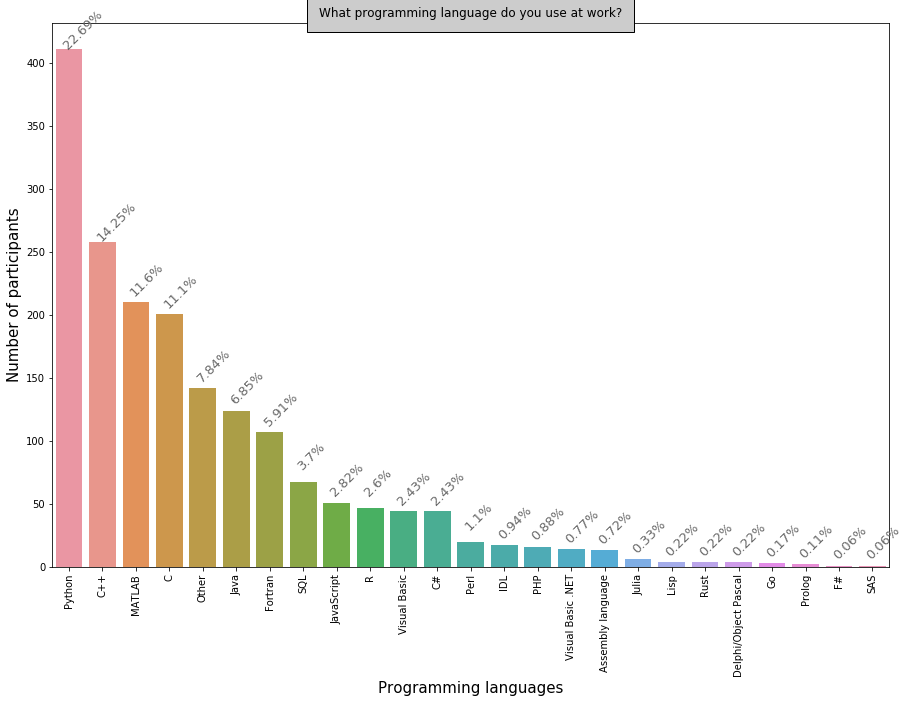

In [3]:
# programming languages
languages = ['Java', 'C', 'Python', 'Plusplus', 'Visual Basic .NET', 'Zehscharf', 'PHP', 'JavaScript', 'SQL', 'Delphi/Object Pascal', 'MATLAB',
            'Assembly language', 'Go', 'Perl', 'R', 'Visual Basic', 'SAS', 'F#', 'Fortran', 'Julia', 'Eisenoxid', 'Lisp', 'Prolog',
            'Haskell', 'IDL', 'Other']

df['What programming language do you use at work? Please select all that apply.'] = df['What programming language do you use at work? Please select all that apply.'].str.replace('C#', 'Zehscharf')
df['What programming language do you use at work? Please select all that apply.'] = df['What programming language do you use at work? Please select all that apply.'].str.replace(re.escape('C++'), 'Plusplus')
df['What programming language do you use at work? Please select all that apply.'] = df['What programming language do you use at work? Please select all that apply.'].str.replace('Rust', 'Eisenoxid')

def find(df, column, list):
    number = {}
    for key in list:
        counts = df[column].str.contains(key).value_counts()
        if counts.index.contains(True):
            number.update({key: counts[True]})
        else:
            number.update({key: 0})
    return number

number = find(df, 'What programming language do you use at work? Please select all that apply.', languages)
plot_data = pd.DataFrame(number, index=[0])
plot_data.rename(columns={'Plusplus': 'C++', 'Zehscharf': 'C#', 'Eisenoxid': 'Rust'}, inplace=True)

plot_data = plot_data.sort_values(by=[0], axis=1, ascending=False)
plot_data.drop([col for col, val in plot_data.sum().iteritems() if val<1], axis=1, inplace=True)


plt.figure(figsize=(15,10))
fig = sns.barplot(data=plot_data, orient='v')
fig.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation= 90)
plt.title('What programming language do you use at work?', bbox={'facecolor':'0.8', 'pad':12})
plt.ylabel('Number of participants', fontsize=15)
plt.xlabel('Programming languages', fontsize=15)

ax = plt.gca()
totals = []
for i in ax.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+ 0.15, i.get_height()+25, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey', rotation=45)
plt.show()

In [4]:
# Top 3 programming languages per institute 
institutes = df['In which institute do you work?'].drop_duplicates().values.tolist()
languages = df['What programming language do you use at work? Please select all that apply.'].drop_duplicates().values.tolist()

def find_combination_number(df, keyword_list):
    df_add = pd.DataFrame(columns=keyword_list, index=[0])
    df = pd.concat([df, df_add], axis=1)
    df[keyword_list] = False
    for index, row in df.iterrows():
        raw_string = row['What programming language do you use at work? Please select all that apply.']
        if raw_string is not nm.NaN:
            lang_str = raw_string.split(';#')
            lang_str.sort()
            for lang in lang_str:
                df.at[index, lang] = True
    return df

def get_users_per_institute(df_sorted, lang_list, institute_list):
    lang_count = pd.DataFrame(data=0, index=lang_list, columns=institute_list)
    for inst in institute_list:
        df_selection = df_sorted[df_sorted['In which institute do you work?'] == inst]
        for index, row in df_selection.iterrows():
            for lang in lang_list:
                if row[lang] == True:
                    lang_count.at[lang, inst] += 1
    return lang_count

df_new = find_combination_number(df, languages)
lang_count = get_users_per_institute(df_new, languages, institutes)

for inst in institutes:
    print(lang_count[inst].nlargest(3))

Python      23
Plusplus    17
C           12
Name: Institute Space 17, dtype: int64
MATLAB    8
Python    5
Other     5
Name: Institute Energy 4, dtype: int64
Python      18
Plusplus    17
MATLAB       9
Name: Institute Space 12, dtype: int64
Python     12
MATLAB      9
Fortran     4
Name: Institute Aeronautics 5, dtype: int64
MATLAB    10
Python     7
C          3
Name: Institute Aeronautics 2, dtype: int64
Python      3
Java        3
Plusplus    2
Name: Institute Aeronautics 4, dtype: int64
Python      18
Plusplus    16
R            8
Name: Institute Transport 1, dtype: int64
R         7
Python    5
Java      2
Name: Institute Transport 3, dtype: int64
Python      15
Other       13
Plusplus    12
Name: Institute Space 16, dtype: int64
MATLAB      29
Plusplus    22
C           18
Name: Institute Aeronautics 8, dtype: int64
Python       5
Other        2
Zehscharf    2
Name: Institute Aeronautics 11, dtype: int64
Python      7
Java        2
Plusplus    1
Name: Institute Space 1, dtype: 

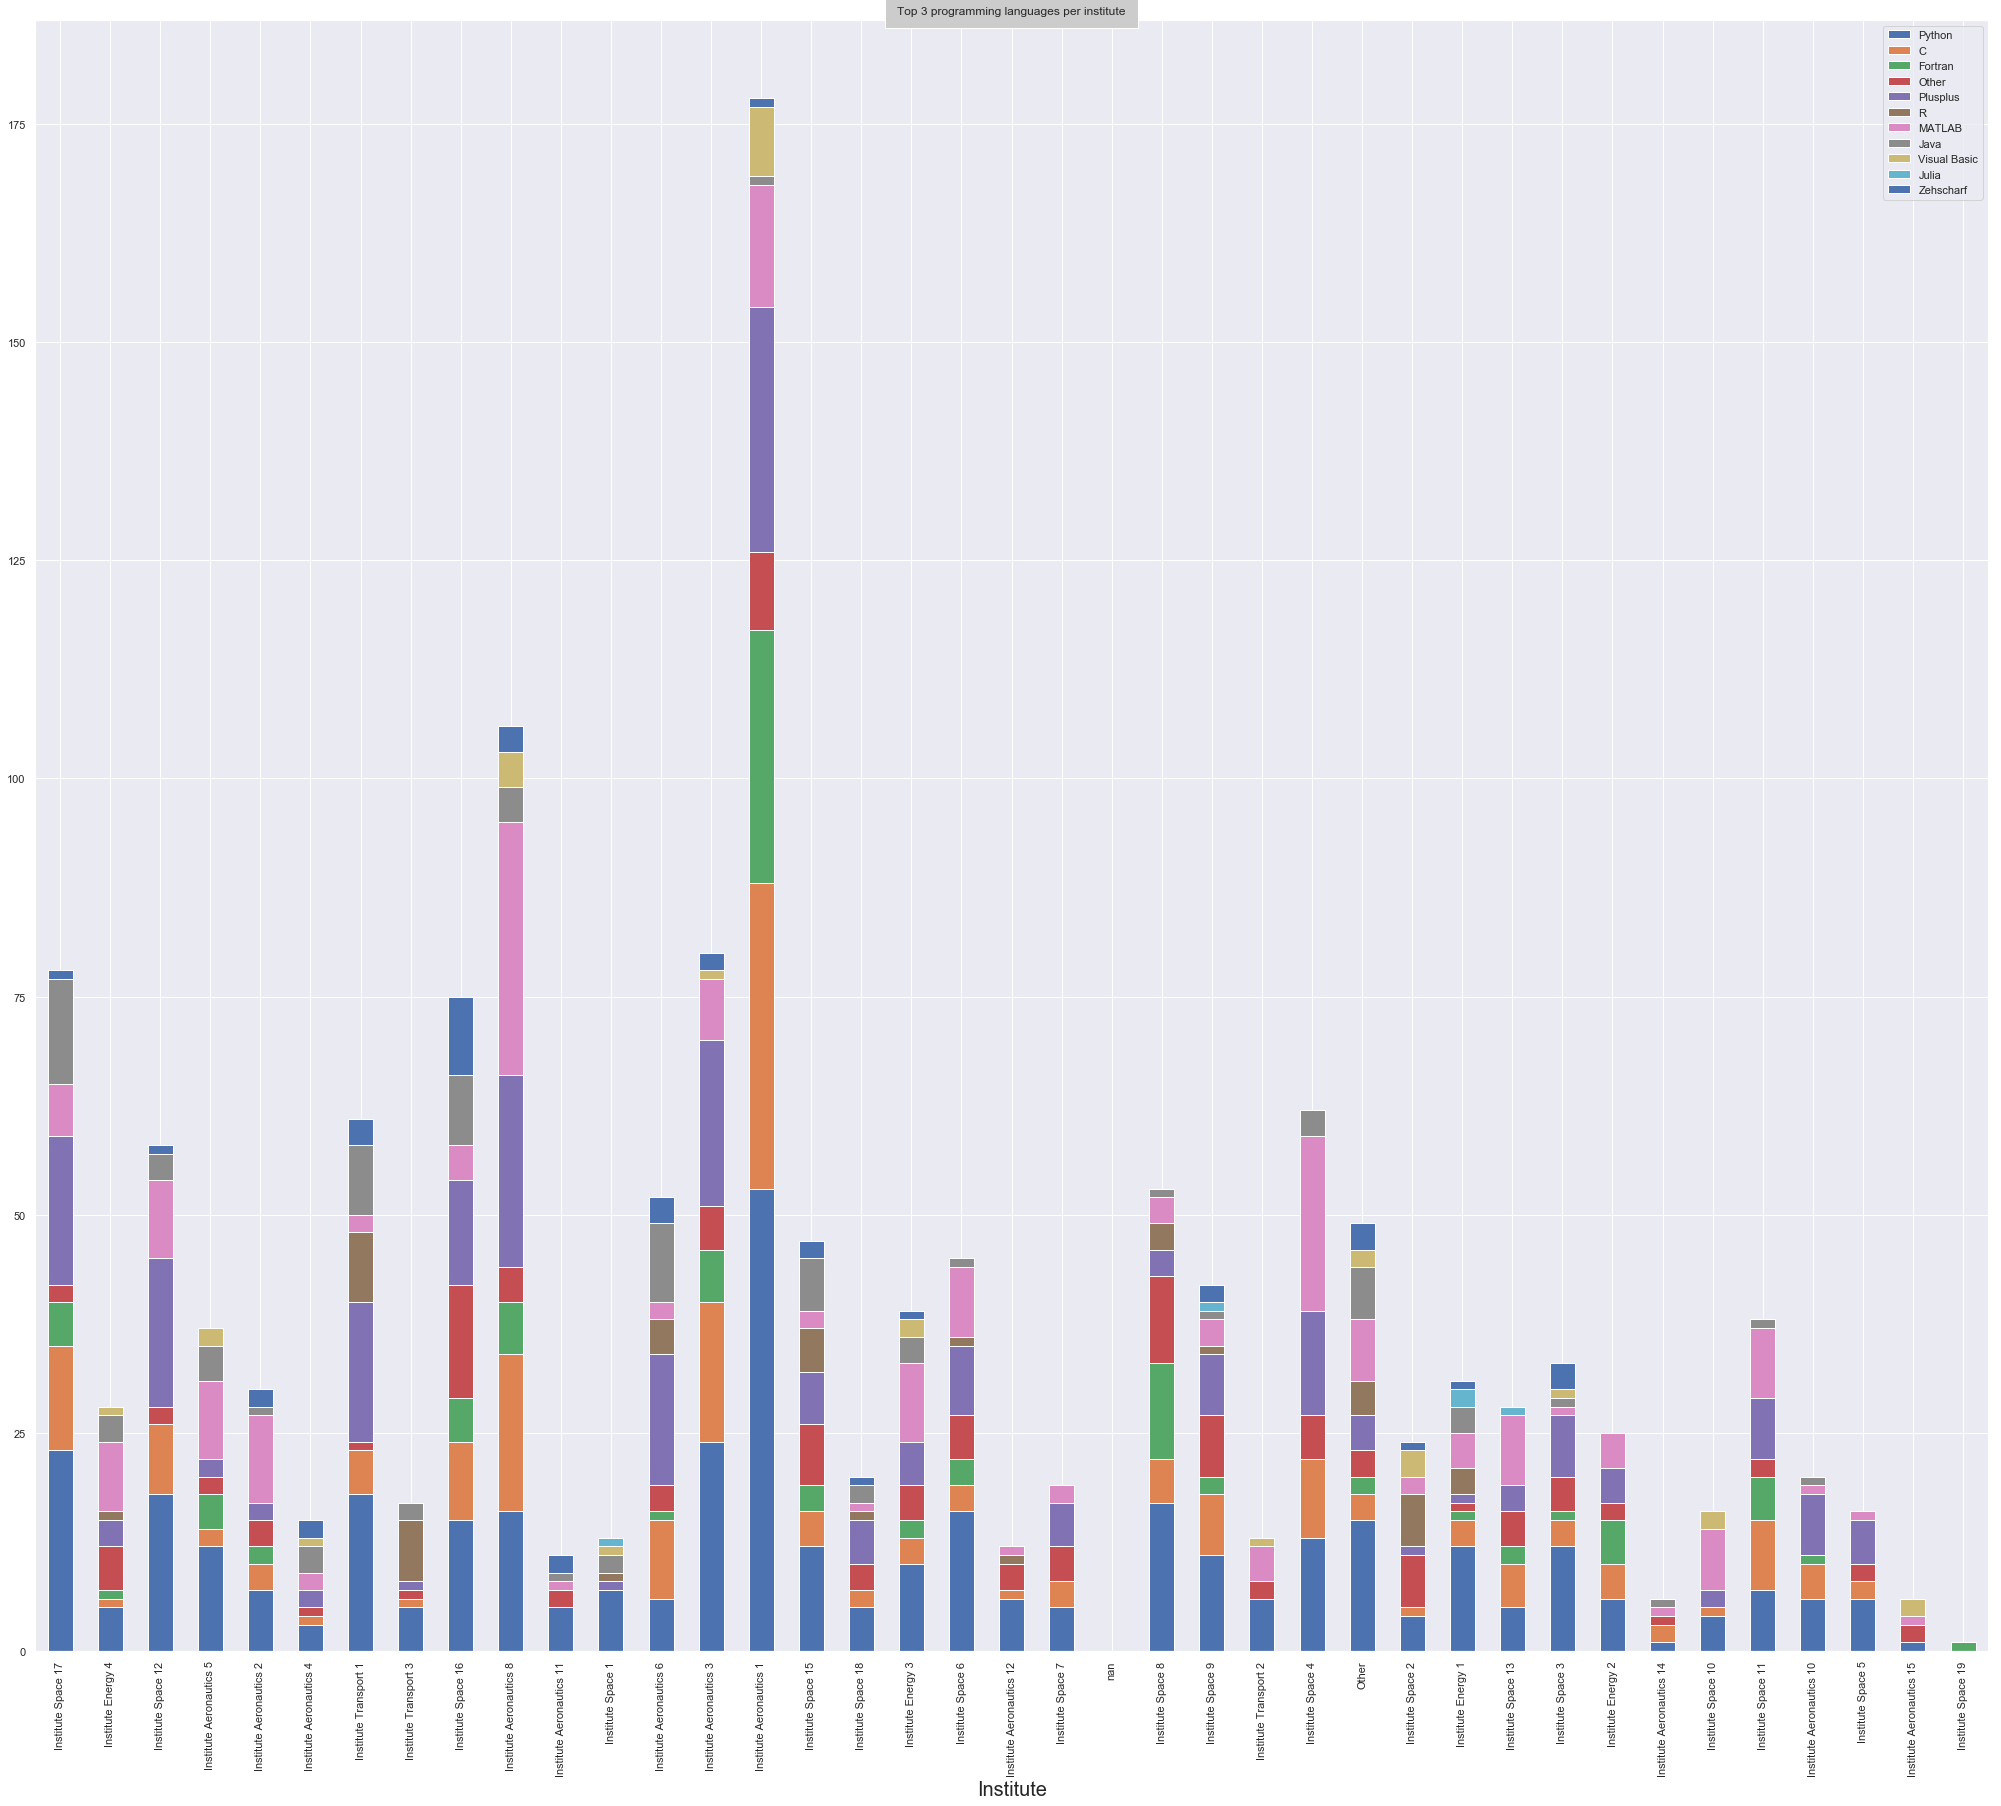

In [5]:
lang_count = lang_count[(lang_count.T != 0).any()]

sns.set()
fig = lang_count.set_index(lang_count.index.values).T.plot(kind='bar', stacked=True, rot=0, figsize=(35,30))
plt.xticks(rotation= 90)
plt.title('Top 3 programming languages per institute', bbox={'facecolor':'0.8', 'pad':12})
plt.ylabel('', fontsize=20)
plt.xlabel('Institute', fontsize=20)
plt.show()

### Which version control tools do you use for software development?

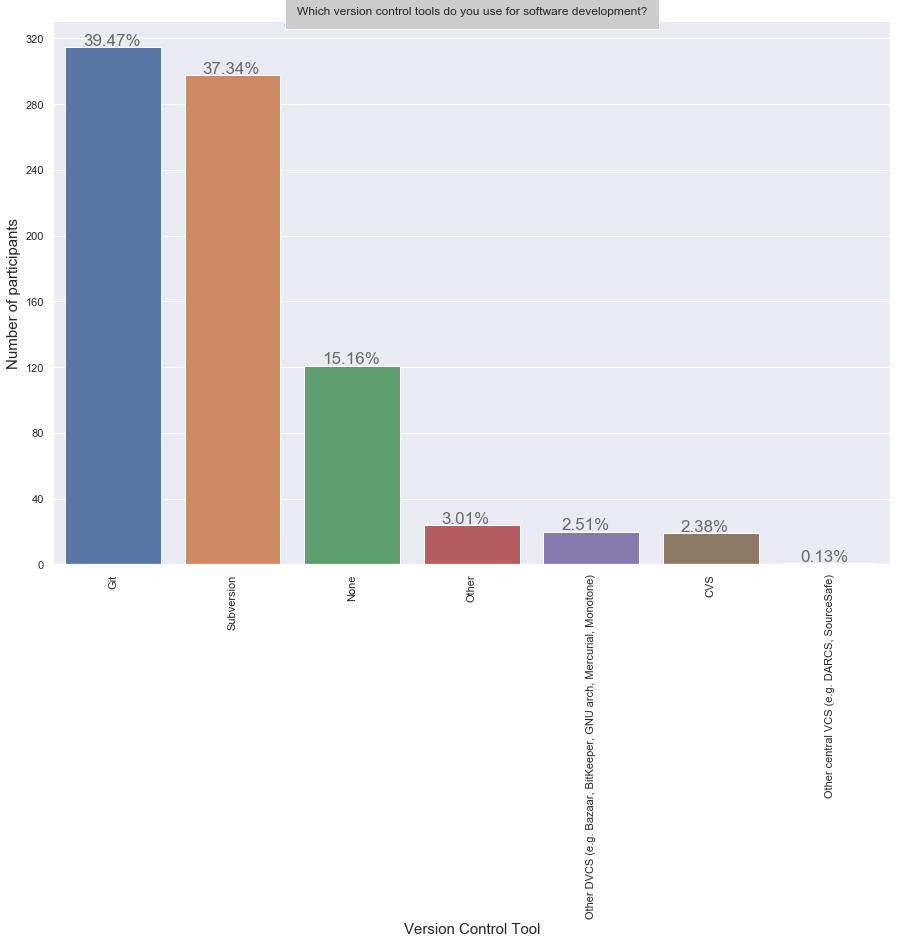

In [6]:
# version controll system - einzeln

languages = ['Subversion', 'Git', 'Bazaar', 'CVS', 'Other',
            'None', 'Scharp']

df['Which version control tools do you use for software development? Please select all that apply.'] = df['Which version control tools do you use for software development? Please select all that apply.'].str.replace(re.escape('Other DVCS (e.g. Bazaar, BitKeeper, GNU arch, Mercurial, Monotone)'), 'Bazaar')
df['Which version control tools do you use for software development? Please select all that apply.'] = df['Which version control tools do you use for software development? Please select all that apply.'].str.replace(re.escape('Other central VCS (e.g. DARCS, SourceSafe)'), 'Scharp')


def find(df, column, list):
    number = {}
    for key in list:
        counts = df[column].str.contains(key).value_counts()
        if counts.index.contains(True):
            number.update({key: counts[True]})
        else:
            number.update({key: 0})
    return number

number = find(df, 'Which version control tools do you use for software development? Please select all that apply.', languages)
plot_data = pd.DataFrame(number, index=[0])
plot_data.rename(columns={'Bazaar': 'Other DVCS (e.g. Bazaar, BitKeeper, GNU arch, Mercurial, Monotone)', 'Scharp': 'Other central VCS (e.g. DARCS, SourceSafe)'}, inplace=True)

plot_data = plot_data.sort_values(by=[0], axis=1, ascending=False)
plot_data.drop([col for col, val in plot_data.sum().iteritems() if val<1], axis=1, inplace=True)

plt.figure(figsize=(15,10))
fig = sns.barplot(data=plot_data, orient='v')
fig.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation= 90)
plt.title('Which version control tools do you use for software development?', bbox={'facecolor':'0.8', 'pad':12})
plt.ylabel('Number of participants', fontsize=15)
plt.xlabel('Version Control Tool', fontsize=15)

ax = plt.gca()
totals = []
for i in ax.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+ 0.15, i.get_height()+.9, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=17,
                color='dimgrey')
plt.show()

In [7]:
#Which version control tools do you use for software development?
count = df['Which version control tools do you use for software development? Please select all that apply.'].value_counts()
results = pd.DataFrame(count.values, count.index)
display(results)

,0
Git,152
Subversion,141
Subversion;#Git,136
None,112
Other,17
Bazaar,11
Git;#CVS,10
Subversion;#None,5
Git;#Bazaar,4
Subversion;#Git;#Bazaar,4


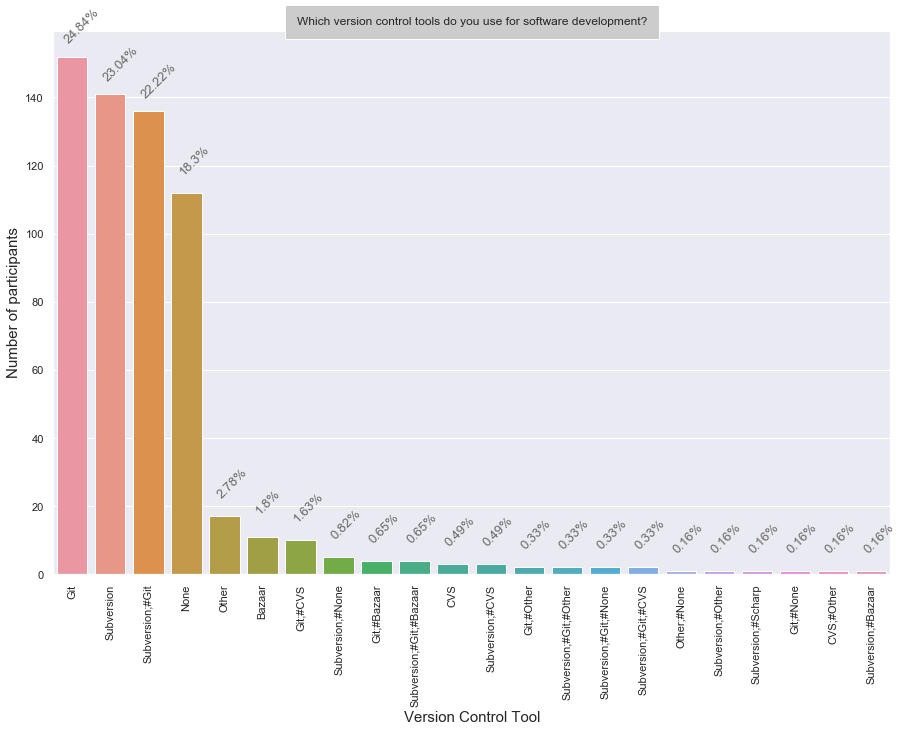

In [8]:
# Version Control Tool - kombiniert
plt.figure(figsize=(15,10))
count = df['Which version control tools do you use for software development? Please select all that apply.'].value_counts()

sns.set(style="darkgrid")
sns.barplot(count.index, count.values)
plt.xticks(rotation= 90)
plt.title('Which version control tools do you use for software development?', bbox={'facecolor':'0.8', 'pad':12})
plt.ylabel('Number of participants', fontsize=15)
plt.xlabel('Version Control Tool', fontsize=15)

ax = plt.gca()
totals = []
for i in ax.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+ 0.15, i.get_height()+12, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='dimgrey', rotation=45)
plt.show()